In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize


In [2]:
data = pd.read_csv("xy_data.csv")
x_data = data['x'].values
y_data = data['y'].values


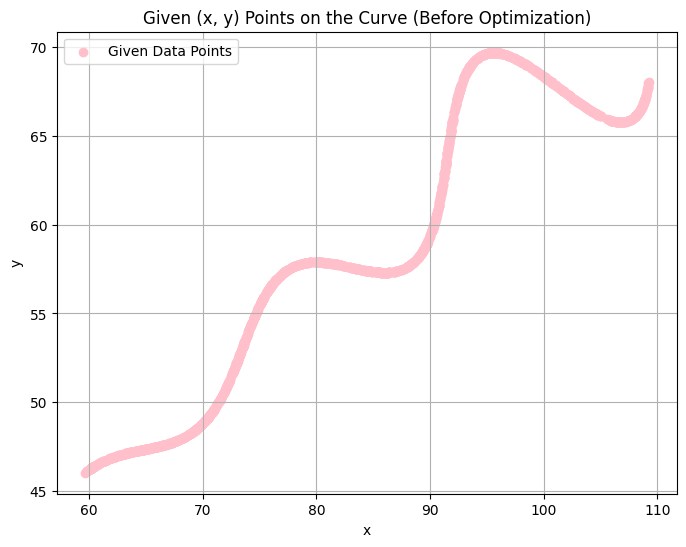

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, color='pink', label='Given Data Points')
plt.title("Given (x, y) Points on the Curve (Before Optimization)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [3]:
def model(t, theta, M, X):
    x = (t * np.cos(theta) - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta)) + X
    y = 42 + t * np.sin(theta) + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta)
    return x, y


In [4]:
def loss(params, t, x_true, y_true):
    theta, M, X = params
    x_pred, y_pred = model(t, theta, M, X)
    return np.mean(np.abs(x_true - x_pred) + np.abs(y_true - y_pred))


In [5]:
t = np.linspace(6, 60, len(x_data))


In [6]:
from scipy.optimize import minimize

initial_guess = [np.radians(20), 0.0, 50]
bounds = [(np.radians(0), np.radians(50)), (-0.05, 0.05), (0, 100)]

result = minimize(loss, initial_guess, args=(t, x_data, y_data), bounds=bounds)
theta_opt, M_opt, X_opt = result.x


In [7]:
print("Optimized Parameters:")
print(f"Theta (degrees): {np.degrees(theta_opt):.4f}")
print(f"M: {M_opt:.4f}")
print(f"X: {X_opt:.4f}")


Optimized Parameters:
Theta (degrees): 28.1184
M: 0.0214
X: 54.9012


/tmp/ipython-input-598800198.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_data, y_data, 'bo-', label='Actual Points',color='gold')


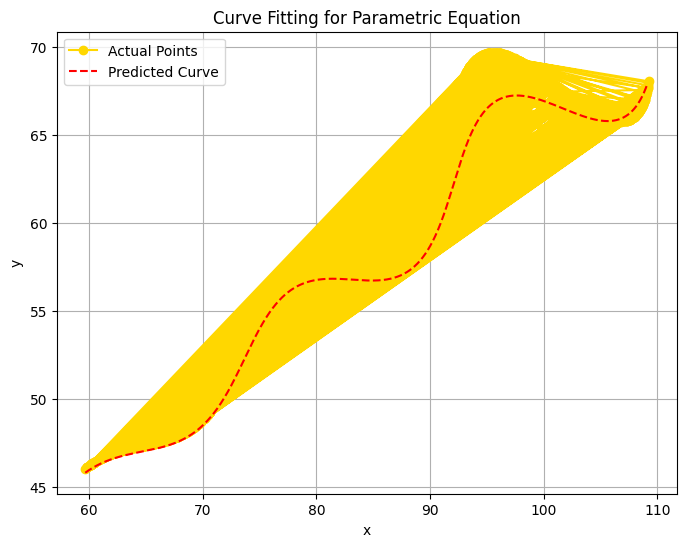

In [19]:
x_pred, y_pred = model(t, theta_opt, M_opt, X_opt)

plt.figure(figsize=(8,6))
plt.plot(x_data, y_data, 'bo-', label='Actual Points',color='gold')
plt.plot(x_pred, y_pred, 'r--', label='Predicted Curve')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fitting for Parametric Equation')
plt.grid(True)
plt.show()


In [11]:
x_pred, y_pred = model(t, theta_opt, M_opt, X_opt)
L1_distance = np.mean(np.abs(x_data - x_pred) + np.abs(y_data - y_pred))

print(f"L1 Distance between predicted and actual curve: {L1_distance:.6f}")


L1 Distance between predicted and actual curve: 25.243396


/tmp/ipython-input-2407200494.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, errors, 'r-', label='Pointwise L1 Error',color='cyan')


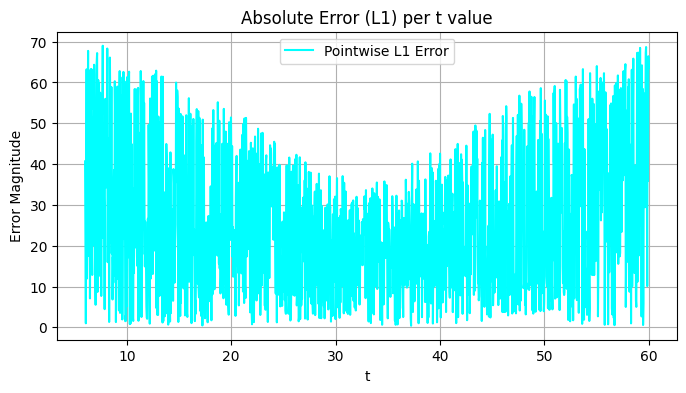

In [15]:
errors = np.abs(x_data - x_pred) + np.abs(y_data - y_pred)

plt.figure(figsize=(8, 4))
plt.plot(t, errors, 'r-', label='Pointwise L1 Error',color='cyan')
plt.title("Absolute Error (L1) per t value")
plt.xlabel("t")
plt.ylabel("Error Magnitude")
plt.legend()
plt.grid(True)
plt.show()
